# Partie I : Implémenter un réseau RNN pour l'analyse de sentiment à l'aide d'un ensemble de données au format CSV. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [3]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Afficher quelques exemples
print(f"Exemple de critique (encodée) : {x_train[0]}")
print(f"Label associé : {y_train[0]}")
print(f"Nombre total de critiques dans le dataset : {len(x_train) + len(x_test)}")

Exemple de critique (encodée) : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label associé : 1
Nombre tot

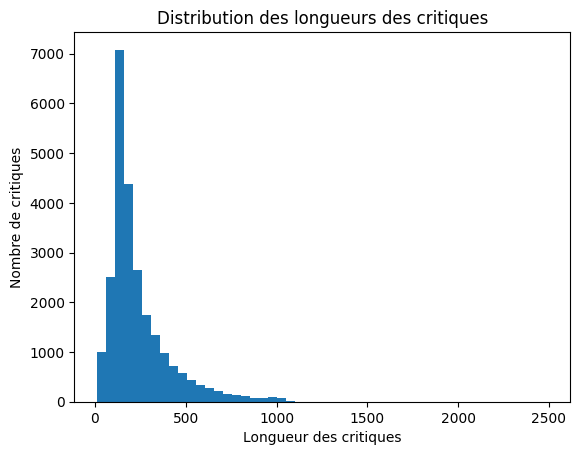

In [4]:
# Longueur des critiques
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.xlabel("Longueur des critiques")
plt.ylabel("Nombre de critiques")
plt.title("Distribution des longueurs des critiques")
plt.show()

In [5]:
# Définir la longueur maximale des séquences
max_length = 200

# Compléter ou tronquer les critiques pour qu'elles aient toutes la même longueur
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print(f"Exemple de critique prétraitée : {x_train[0]}")

Exemple de critique prétraitée : [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   3

In [6]:
# Création du modèle RNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

# Résumé du modèle
model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.4974 - loss: 0.6948 - val_accuracy: 0.4949 - val_loss: 0.6940
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.5845 - loss: 0.6739 - val_accuracy: 0.5016 - val_loss: 0.7007
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.6853 - loss: 0.5661 - val_accuracy: 0.5000 - val_loss: 0.7670
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.7511 - loss: 0.4250 - val_accuracy: 0.5148 - val_loss: 0.8601
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.7829 - loss: 0.3576 - val_accuracy: 0.5071 - val_loss: 0.9621
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.8051 - loss: 0.3240 - val_accuracy: 0.5007 - val_loss: 1.0477
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8295 - loss: 0.2973 - val_accuracy: 0.5160 - val_loss: 1.0564
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8461 - loss: 0.2757 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5106 - loss: 1.3087
Précision sur l'ensemble de test : 0.5098


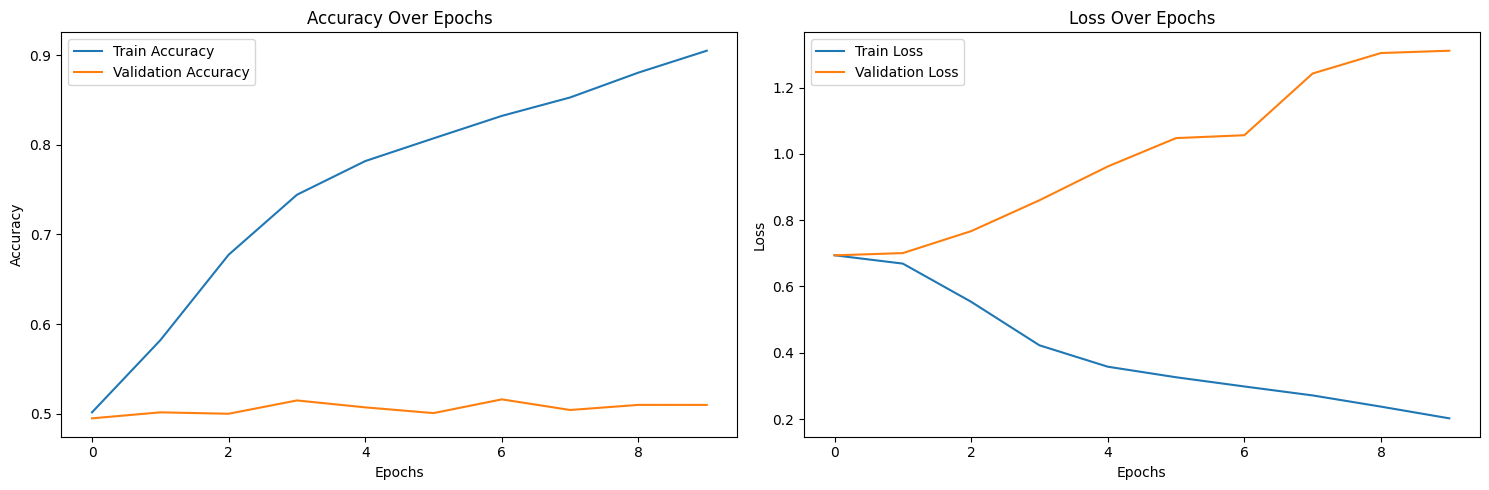

In [9]:
# Évaluer la précision sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

# Visualiser l'évolution de la précision et de la perte
plt.figure(figsize=(15, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Les résultats montrent une forte divergence entre les performances sur les ensembles d'entraînement et de validation. La précision sur l'ensemble d'entraînement augmente de manière constante, tandis que la précision sur l'ensemble de validation reste presque constante, autour de 50 %, ce qui correspond à une classification aléatoire dans un problème binaire. Par ailleurs, la perte de validation augmente avec les époques, indiquant un surapprentissage du modèle. Ce dernier mémorise les données d'entraînement sans généraliser efficacement aux nouvelles données.

In [10]:
# Modèle avec 64 unités dans la couche RNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=64))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.5058 - loss: 0.6949 - val_accuracy: 0.5013 - val_loss: 0.6962
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.5494 - loss: 0.6869 - val_accuracy: 0.5070 - val_loss: 0.6971
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.5841 - loss: 0.6710 - val_accuracy: 0.5308 - val_loss: 0.7071
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.6157 - loss: 0.6438 - val_accuracy: 0.5124 - val_loss: 0.7301
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6728 - loss: 0.5435 - val_accuracy: 0.5008 - val_loss: 0.7991
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.7209 - loss: 0.4479 - val_accuracy: 0.5348 - val_loss: 0.8325
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7425 - loss: 0.3971 - val_accuracy: 0.5288 - val_loss: 0.9431
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.7598 - loss: 0.3686 

In [11]:
history1 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.7787 - loss: 0.3484 - val_accuracy: 0.5110 - val_loss: 1.1818
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7833 - loss: 0.3418 - val_accuracy: 0.5065 - val_loss: 1.2152
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.7876 - loss: 0.3378 - val_accuracy: 0.5016 - val_loss: 1.2283
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.7974 - loss: 0.3263 - val_accuracy: 0.5097 - val_loss: 1.3072
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8236 - loss: 0.2920 - val_accuracy: 0.5098 - val_loss: 1.3762
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8336 - loss: 0.2871 - val_accuracy: 0.5080 - val_loss: 1.4284
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8540 - loss: 0.2638 - val_accuracy: 0.5084 - val_loss: 1.4255
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.8532 - loss: 0.2628 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5084 - loss: 1.5830
Précision sur l'ensemble de test : 0.5100


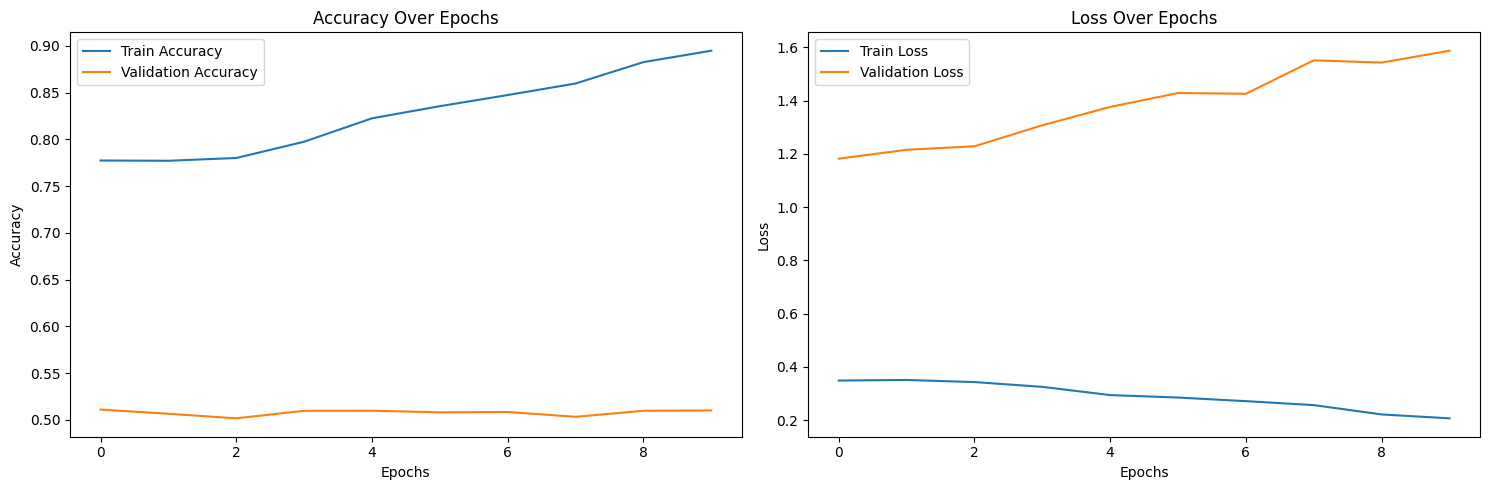

In [12]:
# Évaluer la précision sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

# Visualiser l'évolution de la précision et de la perte
plt.figure(figsize=(15, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Les résultats montrent une amélioration notable par rapport à la première itération, mais il persiste des signes de surapprentissage. La précision sur l'ensemble d'entraînement atteint près de 90 %, tandis que celle sur l'ensemble de validation reste autour de 50 %, ce qui suggère que le modèle ne parvient toujours pas à généraliser correctement. De plus, la perte de validation augmente de manière continue, tandis que la perte d'entraînement se stabilise à un niveau faible, indiquant que le modèle surapprend les données d'entraînement.

In [13]:
# Changer la fonction d'activation en 'tanh'
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.4990 - loss: 0.6957 - val_accuracy: 0.5006 - val_loss: 0.6941
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6018 - loss: 0.6627 - val_accuracy: 0.4984 - val_loss: 0.7110
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.7057 - loss: 0.5143 - val_accuracy: 0.5134 - val_loss: 0.9053
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.7488 - loss: 0.4229 - val_accuracy: 0.4983 - val_loss: 0.8917
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.7834 - loss: 0.3578 - val_accuracy: 0.5008 - val_loss: 0.9960
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.8101 - loss: 0.3257 - val_accuracy: 0.4988 - val_loss: 1.0610
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8286 - loss: 0.3028 - val_accuracy: 0.5030 - val_loss: 1.2317
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.8594 - loss: 0.2723 - val_accur

In [14]:
history2 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.9488 - loss: 0.1290 - val_accuracy: 0.5033 - val_loss: 1.4899
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9526 - loss: 0.1275 - val_accuracy: 0.5001 - val_loss: 1.5910
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9621 - loss: 0.1027 - val_accuracy: 0.5032 - val_loss: 1.7046
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9791 - loss: 0.0654 - val_accuracy: 0.5036 - val_loss: 1.7575
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9896 - loss: 0.0399 - val_accuracy: 0.4993 - val_loss: 1.8008
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.9814 - loss: 0.0553 - val_accuracy: 0.5045 - val_loss: 1.9395
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.9938 - loss: 0.0237 - val_accuracy: 0.5057 - val_loss: 2.0200
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9933 - loss: 0.0223 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5003 - loss: 2.0775
Précision sur l'ensemble de test : 0.5042


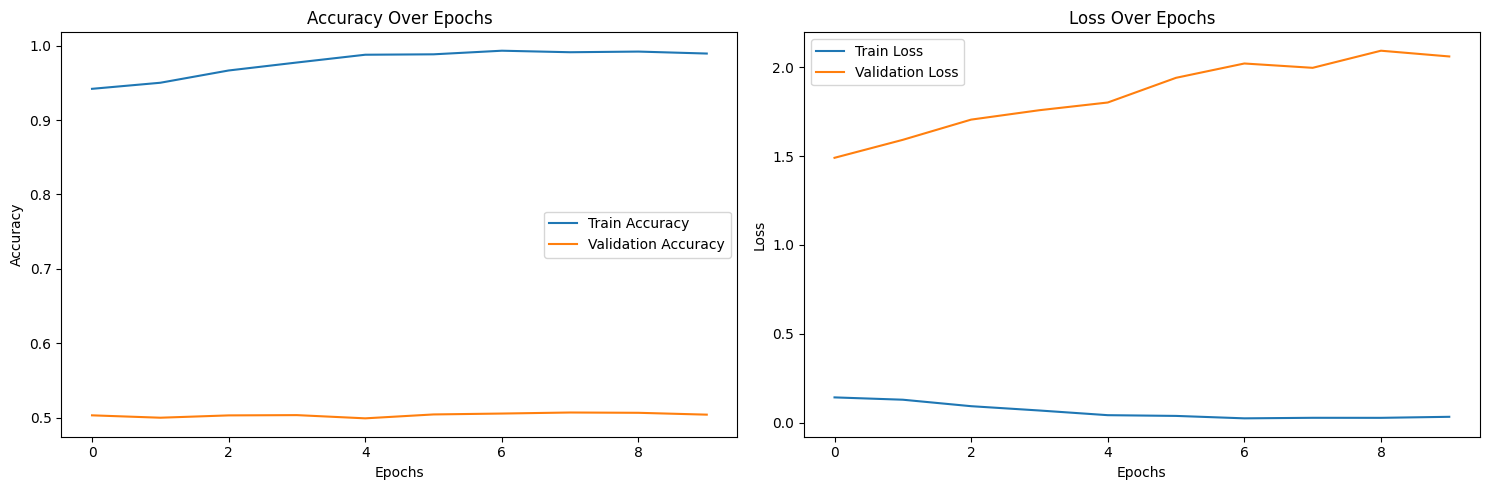

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

plt.figure(figsize=(15, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Le modèle RNN atteint une précision maximale d'environ 0.95 sur l'ensemble d'entraînement, mais cette performance ne se traduit pas sur l'ensemble de test où la précision plafonne à 0.5042. Cela indique un sur-apprentissage du modèle, c'est-à-dire que le modèle a trop appris les spécificités de l'ensemble d'entraînement au détriment de sa capacité à généraliser à de nouvelles données. La courbe de perte de validation confirme cette hypothèse en montrant une augmentation progressive à partir d'un certain nombre d'epochs.